In [116]:
library(data.table)
library(dplyr)
library(ggplot2)

In [1]:
load('/home/jmurga/mktComparison/results/simulations/wd/ne1000/baseline.RData')

In [22]:
lapply(list.files(pattern="*",include.dirs=T,full.names=T,path='/home/jmurga/mktComparison/results/simulations/wd/ne1000'),load,.GlobalEnv)

In [35]:
baseline1000$data[baseline1000$data$variable=='bDGRP1']$value

[1] 0,1470951 0,1557613 0,1567310 0,1473567 0,1537050 0,1495147 0,1531510
 [8] 0,1511362 0,1464581 0,1466927 0,1550308 0,1440197 0,1522643 0,1500030
[15] 0,1434077 0,1468861 0,1493576 0,1490442 0,1505816 0,1460614 0,1415801
[22] 0,1546802 0,1487924 0,1483306 0,1535890 0,1530411 0,1510786 0,1427697
[29] 0,1498618 0,1513067 0,1506544 0,1538609 0,1497576 0,1481311 0,1521466
[36] 0,1599570 0,1459590 0,1501174 0,1491214 0,1519940 0,1423563 0,1480980
[43] 0,1472061 0,1551314 0,1522496 0,1469265 0,1489225 0,1560719 0,1459639
[50] 0,1388723

In [41]:
l<-list(baseline1000$data,f11000$data,f21000$data,f31000$data,g11000$data,g21000$data)

In [42]:
for(i in 1:length(l)){
    
    print(i)
    
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

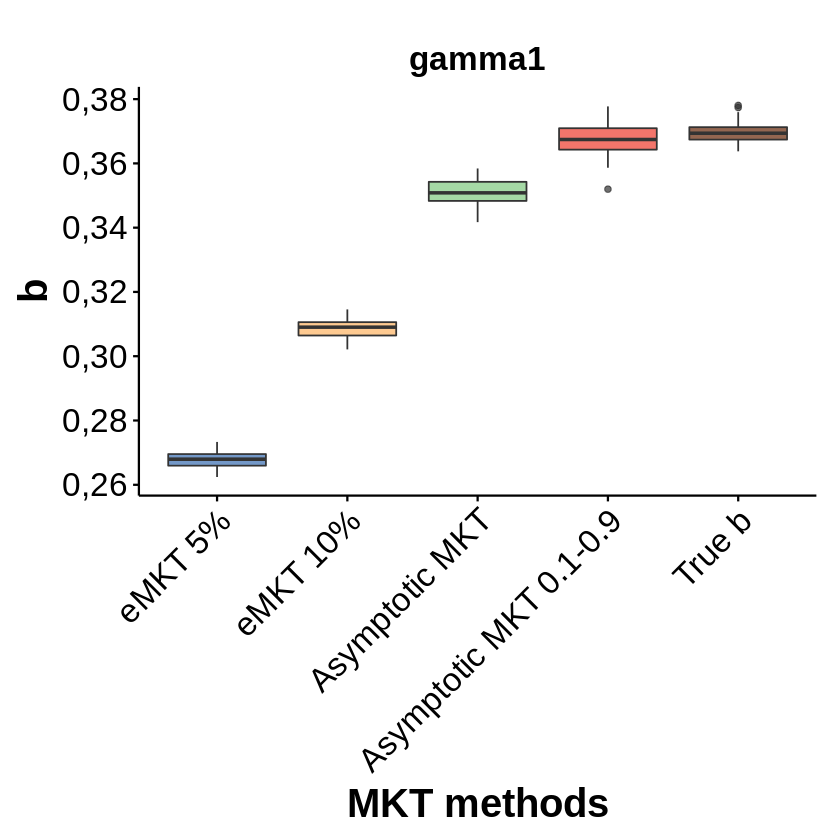

In [69]:
g11000$plot

In [56]:
t.test(l[[i]][l[[i]]$variable=='bAsymptotic2','value'],l[[i]][l[[i]]$variable=='trueB','value'])


	Welch Two Sample t-test

data:  l[[i]][l[[i]]$variable == "bAsymptotic2", "value"] and l[[i]][l[[i]]$variable == "trueB", "value"]
t = -2,6852, df = 86,886, p-value = 0,008681
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,0038969381 -0,0005817381
sample estimates:
mean of x mean of y 
0,3673712 0,3696105 


In [66]:
t.test(l[[i]][l[[i]]$variable=='bAsymptotic2',]$value,l[[i]][l[[i]]$variable=='trueB',]$value)


	Welch Two Sample t-test

data:  l[[i]][l[[i]]$variable == "bAsymptotic2", ]$value and l[[i]][l[[i]]$variable == "trueB", ]$value
t = -2,6852, df = 86,886, p-value = 0,008681
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,0038969381 -0,0005817381
sample estimates:
mean of x mean of y 
0,3673712 0,3696105 


In [81]:
dfError = fread('grep error /home/jmurga/mktComparison/results/simulations/wd/neutralWd.tab')
dfMean = fread('grep mean /home/jmurga/mktComparison/results/simulations/wd/neutralWd.tab')

In [82]:
dfError

V1,V2,V3,V4,V5,V6,V7
error,"0,07472224","0,04531050","0,009919001","0,02682997",0,baseline
error1,"0,08297116","0,05057534","0,012921185","0,03168632",0,fitnessDel1e-2
error2,"0,03094922","0,01821830","0,004893224","0,01281168",0,fitnessDel-2
error3,"0,04991576","0,03032833","0,008005218","0,01936707",0,fitnessDel2e-1
error4,"0,10101335","0,05983671","0,020015233","0,00343827",0,gamma1
error5,"0,04636338","0,02660469","0,014001983","0,02720401",0,gamma1e-1


In [85]:
source('/home/jmurga/mktComparison/scripts/src/plotStyle.R')

In [ ]:
wdOnsimulatedPlot(scenario = "baseline", simulationsPath = "/home/jmurga/mktComparison/results/wdEstimation/ne1000")


In [96]:
scenario = "baseline"; simulationsPath = "/home/jmurga/mktComparison/results/simulations/wd/ne1000"

In [104]:
y <- load(paste0(simulationsPath,'/',scenario,'.RData'))

In [111]:
simulationResults <- simulationResults$data

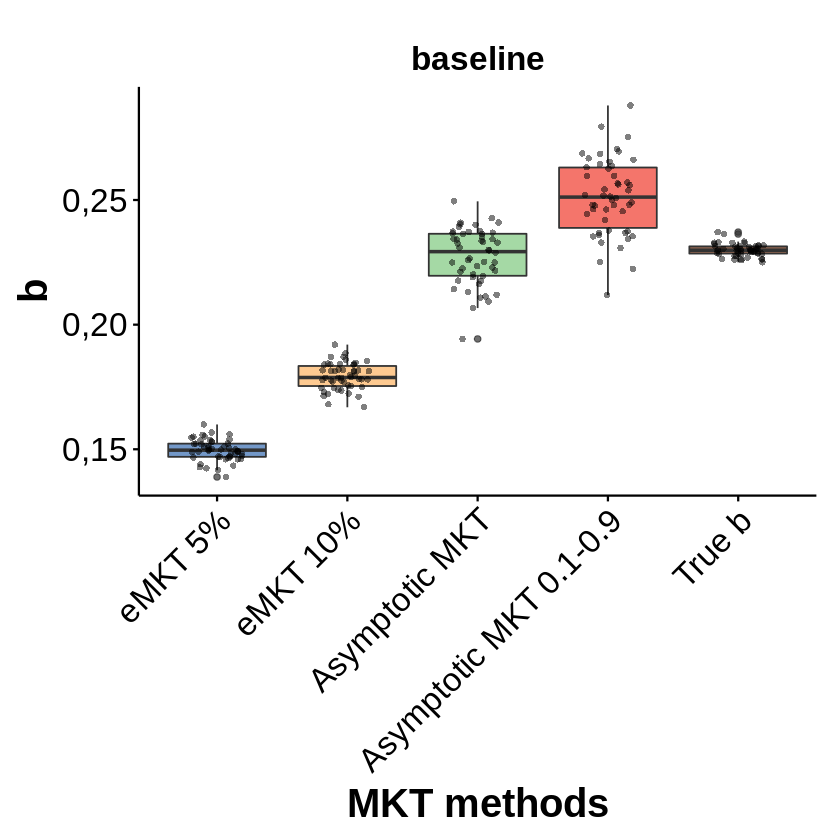

In [133]:
ggplot(simulationResults, aes(x=variable, y=value, fill=variable)) + 
		geom_boxplot(color="grey20",alpha=0.7) + 
		labs(x = "MKT methods", y='b') + 
themePublication()+
		scaleFillPublication(name="Method", labels=c('bDGRP1' = 'eMKT 5%', 'bDGRP2' = 'eMKT 10%', 'bFWW1' = 'FWW 5%', 'bFWW2' = 'FWW 10%','bAsymptotic1'='Asymptotic MKT','bAsymptotic2'='Asymptotic MKT', 'trueB'='True b')) + 
		scale_y_continuous(breaks = pretty(simulationResults$value, n = 5)) + 
		scale_x_discrete(labels=c('bStandard'='Standard', 'bDGRP1' = 'eMKT 5%', 'bDGRP2' = 'eMKT 10%','bAsymptotic1'='Asymptotic MKT','bAsymptotic2'='Asymptotic MKT 0.1-0.9', 'trueB'='True b')) +  
		guides(fill=FALSE) + 
		ggtitle(paste0(scenario)) + 
		theme(axis.text.x = element_text(angle = 45, hjust = 1,size=20),axis.text.y= element_text(size=20),plot.title=element_text(size=20),axis.title.y = element_text(size=24),axis.title.x = element_text(size=24))+		geom_jitter(shape=16, position=position_jitter(0.2),alpha=0.5)
